# Plots for Luke from LMD94 test case
## (Currently without suppressing enhanced diffusivity)

In [1]:
from matplotlib import pyplot as plt            # For plotting
import numpy as np
from netcdf_read import read_from_file          # Local module for reading data

# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
start_day = dict();
end_day   = dict();
start_day['60s'] = 3*1496
end_day['60s'] = 3*1496
start_day['300s'] = 3*300
end_day['300s'] = 3*300
start_day['600s'] = 3*150
end_day['600s'] = 3*150
start_day['1200s'] = 3*75
end_day['1200s'] = 3*75

data = dict()

In [3]:
# 20cm_1200s for this tests case
dt = '1200s'
dz = '20cm'
date = start_day[dt]-1

# LMD94: linear interp, no Richardson mixing
# LMD94a: quadratic interp, no Richardson mixing
# LMD94b: linear interp, with Richardson mixing
# LMD94c: quadratic interp, with Richardson mixing
indices = ['LMD94', 'LMD94a', 'LMD94b', 'LMD94c']

for ind in indices:
    data[ind] = read_from_file(start_day[dt], end_day[dt],
                               './test_output/20cm_1200s.'+ind+'.nc')
    print "%s: HBLT when day is %f = %f" % (ind, data[ind]['time'][start_day[dt]-1], data[ind]['h'][start_day[dt]-1])

LMD94: HBLT when day is 3.000000 = -11.804348
LMD94a: HBLT when day is 3.000000 = -11.870991
LMD94b: HBLT when day is 3.000000 = -38.099998
LMD94c: HBLT when day is 3.000000 = -37.700119


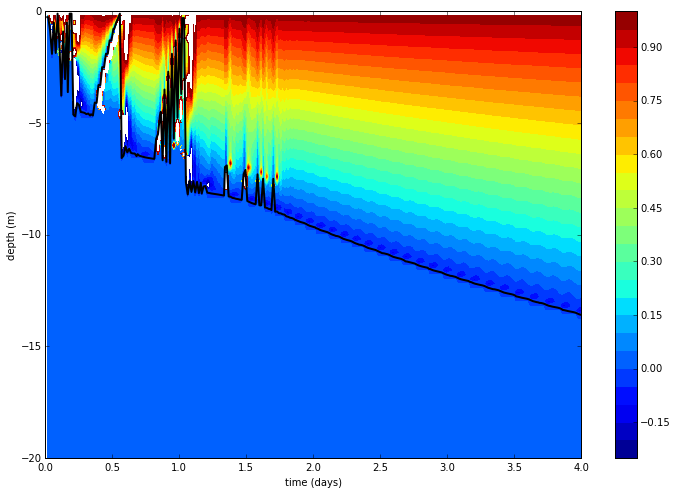

In [4]:
# LMD94: linear interp, no Richardson mixing
ind = 'LMD94'
plt.contourf(data[ind]['time'], data[ind]['zl'], data[ind]["w'T'_raw"].T, levels=numpy.arange(-.25,1.05,.05));
plt.colorbar(); plt.ylim((-20,0)); plt.xlim((0,4));#plt.xlim((2.45,4)); # plt.xlim((2.45,3.25));
plt.xlabel('time (days)'); plt.ylabel('depth (m)');
plt.plot(data[ind]['time'], data[ind]['h'], '-k', linewidth=2.0);

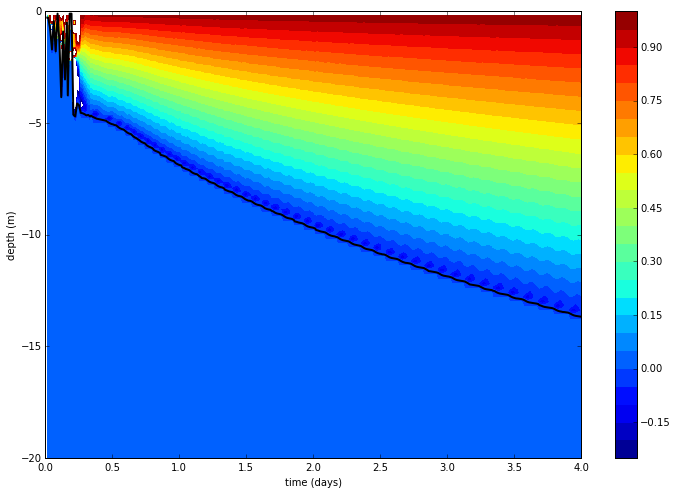

In [5]:
# LMD94a: quadratic interp, no Richardson mixing
ind = 'LMD94a'
date = start_day[dt]-1
plt.contourf(data[ind]['time'], data[ind]['zl'], data[ind]["w'T'_raw"].T, levels=numpy.arange(-.25,1.05,.05));
plt.colorbar(); plt.ylim((-20,0)); plt.xlim((0,4));#plt.xlim((2.45,4)); # plt.xlim((2.45,3.25));
plt.xlabel('time (days)'); plt.ylabel('depth (m)');
plt.plot(data[ind]['time'], data[ind]['h'], '-k', linewidth=2.0);

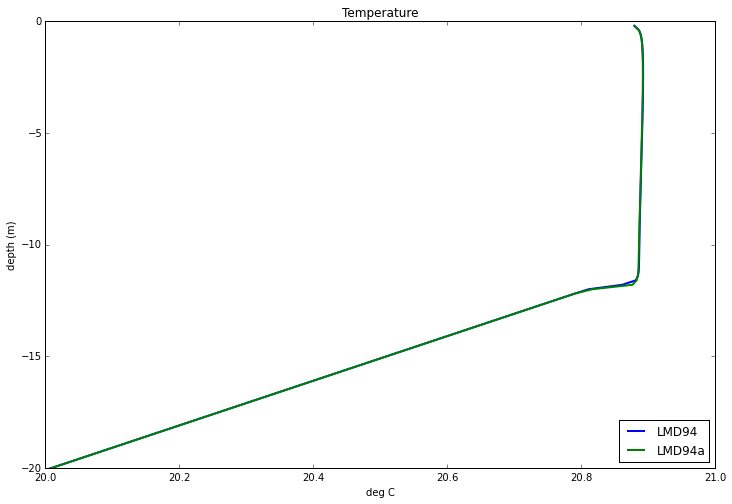

In [6]:
# Compare this plot to dashed line in LMD94 Figure C3
for ind in ['LMD94','LMD94a']:
    plt.plot(data[ind]["temperature"][date],data[ind]['zl'],'-', linewidth=2.0, label=ind);
plt.ylim((-20,0)); plt.xlim((20,21)); plt.legend(loc=4);
plt.title('Temperature'); plt.xlabel('deg C'); plt.ylabel('depth (m)');

LMD94: min w'T' = -0.119755
LMD94a: min w'T' = -0.063507


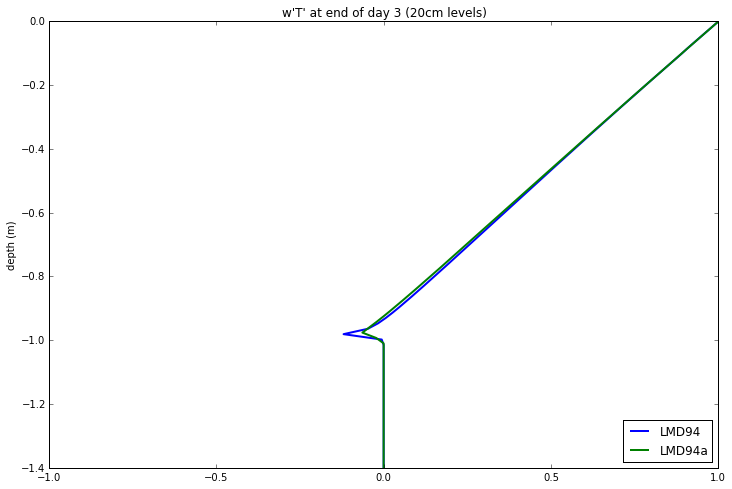

In [7]:
# Compare this plot to dashed line in LMD94 Figure 1
ind = 'LMD94'
for ind in ['LMD94','LMD94a']:
    plt.plot(data[ind]["w'T'"],-abs(data[ind]['zplot']/data[ind]['h'][end_day[dt]]),'-', linewidth=2.0, label=ind);
    print "%s: min w'T' = %f" % (ind, amin(data[ind]["w'T'"]))
plt.title("w'T' at end of "+data[ind]['day_for_plot'] + " (" + dz +" levels)");
plt.ylabel('depth (m)'); plt.xlim((-1,1)); plt.ylim((-1.4,0)); plt.legend(loc=4);